In [2]:
# AND GATE

#data = [ [ 0, 0],
 #        [ 0, 1],
  #       [ 1, 0],
   #      [ 1, 1] ]
#target = [0,
 #         0,
  #        0,
   #       1 ]


In [24]:
# OR GATE

data = [ [ 0, 0],
         [ 0, 1],
         [ 1, 0],
         [ 1, 1] ]
target = [  0,
            1,
            1,
            1 ]


 Datos de entrenamiento:

In [25]:
print ("Data:",data)
print ("target", target)

Data: [[0, 0], [0, 1], [1, 0], [1, 1]]
target [0, 1, 1, 1]


 Initialize weights and bias and learning rate

iterate over data training

In [23]:
import sklearn
import keras
import scipy
import tensorflow
from tabulate import tabulate

w1 = 0.3
w2 = 0.8
b = 0.6

lr = 0.5

itreations= 10

data_out = [ ]
weigths = [ ]
weigths.append( [w1, w2, b])

for epoch in range ( itreations):

  #first =  true

  for x,y in zip (data,target):
    yin = w1*x[0] + w2*x[1] + b

    #activation function
    if ( yin >= -0.5  ): #recordar modificar
       yin = 1
    else:
       yin = 0

    e = y-yin


    if int(y) != int(yin):  # update weigths and bias
      w1 = w1 + lr*e*x[0]
      w2 = w2 + lr*e*x[1]
      b = b + lr*e
      #store the updated weights
      weigths.append( [w1, w2, b])

    data_out.append(  [epoch, x[0], x[1], yin, y, y, e, '-', w1,w2,b, int(y) != int(yin)] )

  data_out.append (['-','-','-','-','-','-','-','-','-','-','-'])



print(tabulate( data_out,
                headers=['Epoch', 'x1', 'x2', 'yin', 'y', 't', 'E','-', 'w1', 'w2','b', 'update']))
#print("\n")

Epoch    x1    x2    yin    y    t    E    -    w1    w2    b                    update
-------  ----  ----  -----  ---  ---  ---  ---  ----  ----  -------------------  --------
0        0     0     1      0    0    -1   -    0.3   0.8   0.09999999999999998  True
0        0     1     1      1    1    0    -    0.3   0.8   0.09999999999999998  False
0        1     0     1      1    1    0    -    0.3   0.8   0.09999999999999998  False
0        1     1     1      1    1    0    -    0.3   0.8   0.09999999999999998  False
-        -     -     -      -    -    -    -    -     -     -
1        0     0     1      0    0    -1   -    0.3   0.8   -0.4                 True
1        0     1     1      1    1    0    -    0.3   0.8   -0.4                 False
1        1     0     1      1    1    0    -    0.3   0.8   -0.4                 False
1        1     1     1      1    1    0    -    0.3   0.8   -0.4                 False
-        -     -     -      -    -    -    -    -     -     -
2   

Visual Representation

[0.3, 0.8, 0.6]
[0.3, 0.8, 0.09999999999999998]
[0.3, 0.8, -0.4]
[0.3, 0.8, -0.9]
[0.8, 0.8, -0.4]
[0.8, 0.8, -0.9]


<Figure size 640x480 with 0 Axes>

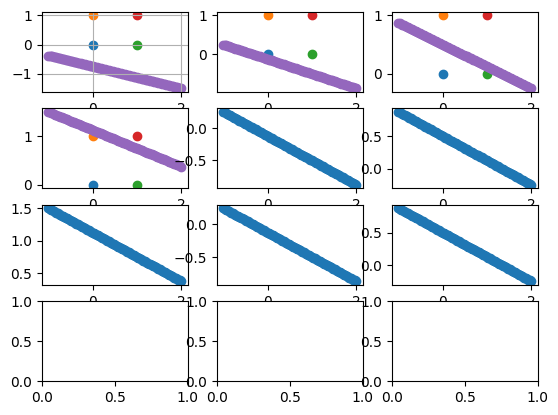

In [26]:
#construct hyperplane: ax + by + cz = d
import numpy as np
import matplotlib.pyplot as plt

a,b,c = w1,w2,b

data_arr = np.array( data )

x_min = min( data_arr[: ,0 ]-1)
x_max = max( data_arr[: ,0 ]+1)

x = np.linspace(x_min, x_max, 100)

#Xs,Ys = np.meshgrid(x,y)
#Zs = (d - a*Xs - b*Ys) / c

pairs = []

for ws in weigths:
  it = []
  for xi in  x :
    #   weigths.append( [w1, w2, b])
    y = (-ws[2] -ws[0]*xi) /ws[1]
    it.append( [xi,y])

  pairs.append(it)
  print(ws)

data_arr = np.array( data )
data_arr_x = data_arr [ : , 0 ]
data_arr_y = data_arr [ : , 1 ]

pairs = np.array(pairs)

plt.figure(1)

fig, axis = plt.subplots(4, 3)

for idx,idy in zip ( data_arr_x, data_arr_y  ):
    axis[0,0].scatter(idx, idy )
    axis[0,1].scatter(idx, idy )
    axis[0,2].scatter(idx, idy )
    axis[1,0].scatter(idx, idy )
    #axis[1,1].scatter(idx, idy )
    #axis[1,2].scatter(idx, idy )

axis[0,0].scatter(pairs[0,: ,0], pairs[0, :,1] )
axis[0,0].grid()
axis[0,1].scatter(pairs[1,: ,0], pairs[1, :,1]  )
axis[0,2].scatter(pairs[2,: ,0], pairs[2, :,1]  )
axis[1,0].scatter(pairs[3,: ,0], pairs[3, :,1]  )
axis[1,1].scatter(pairs[1,: ,0], pairs[1, :,1]  )
axis[1,2].scatter(pairs[2,: ,0], pairs[2, :,1]  )
axis[2,0].scatter(pairs[3,: ,0], pairs[3, :,1]  )
axis[2,1].scatter(pairs[1,: ,0], pairs[1, :,1]  )
axis[2,2].scatter(pairs[2,: ,0], pairs[2, :,1]  )



